# Finder charts for Messier and NGC objects

Update IERS Bulletin A Earth Orientation Parameters from USNO if necessary.

In [ ]:
from astroplan import download_IERS_A
download_IERS_A()

General imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import astropy.units as u
from astropy.io import fits
from astropy.time import Time
from astropy.coordinates import EarthLocation, SkyCoord
from astroplan import Observer, FixedTarget

from astroquery.skyview import SkyView
import aplpy

In [2]:
%matplotlib inline

## Observer location and time

An observer can be initialized with a site from the astropy sites list. `EarthLocation.get_site_names()` will return a list of default observatories. Sites not in the default list can be defined using `EarthLocation.from_geodetic()`.

### Klee Mill, Sykesville, MD

In [3]:
loc_km = EarthLocation.from_geodetic(-76.989933*u.deg, 39.435108*u.deg, 197*u.m)
km = Observer(location=loc_km, name="Klee Mill, Sykesville, MD", timezone="US/Eastern")

### Bear Branch Observatory, Westminster, MD

In [4]:
# from Google Maps
loc = EarthLocation.from_geodetic(-76.986530*u.deg, 39.647191*u.deg, 210*u.m)
bb = Observer(location=loc, name="Bear Branch Observatory, Westminster, MD",
                       timezone="US/Eastern")

**UTC Date and Time for obervations**

In [5]:
time = Time('2019-05-09 01:00:00') # 2019-05-08 21:00:00 EDT
timeNow = Time.now() #current time

## Finder chart

M3 (NGC 5272), GlCl in Her

In [6]:
M3 = SkyView.get_images(position='M3', survey=['DSS'], radius=59*u.arcmin, pixels='600')
M3[0].writeto('./data/SkyView/M3_DSS.fits', overwrite=True)

INFO: Auto-setting vmin to  1.506e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.305e+04 [aplpy.core]
INFO: Auto-setting resolution to 99.3377 dpi [aplpy.core]


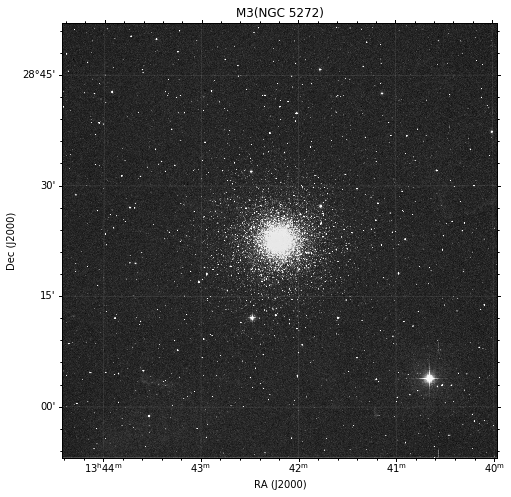

In [7]:
with fits.open('./data/SkyView/M3_DSS.fits') as M3_DSS:
    fig = aplpy.FITSFigure(M3_DSS,figsize=(8,8))
    fig.set_theme('pretty')
    fig.set_title('M3(NGC 5272)')
    fig.add_grid()
    fig.grid.set_alpha(0.1)
    fig.show_grayscale()
    fig.savefig('./plots/M3_DSS_black.pdf')